## Portfolio optimization

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

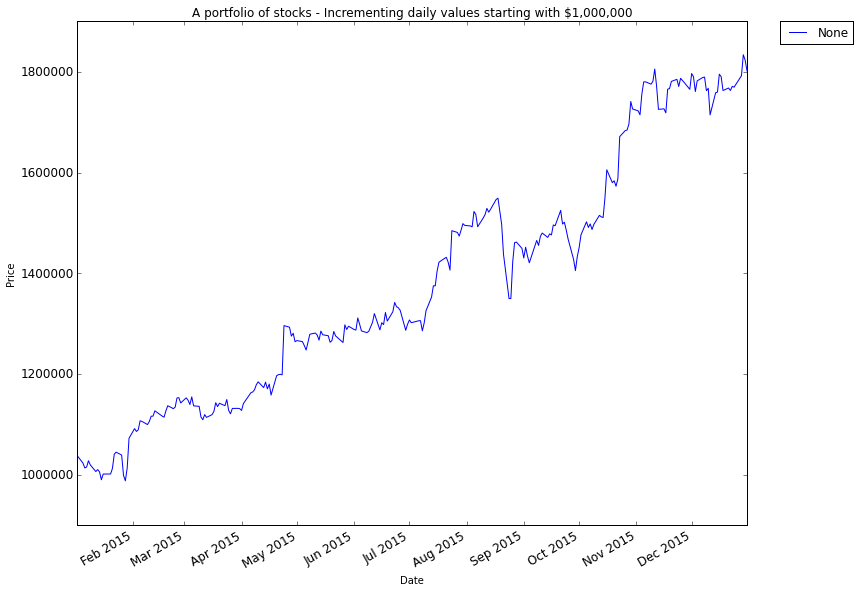

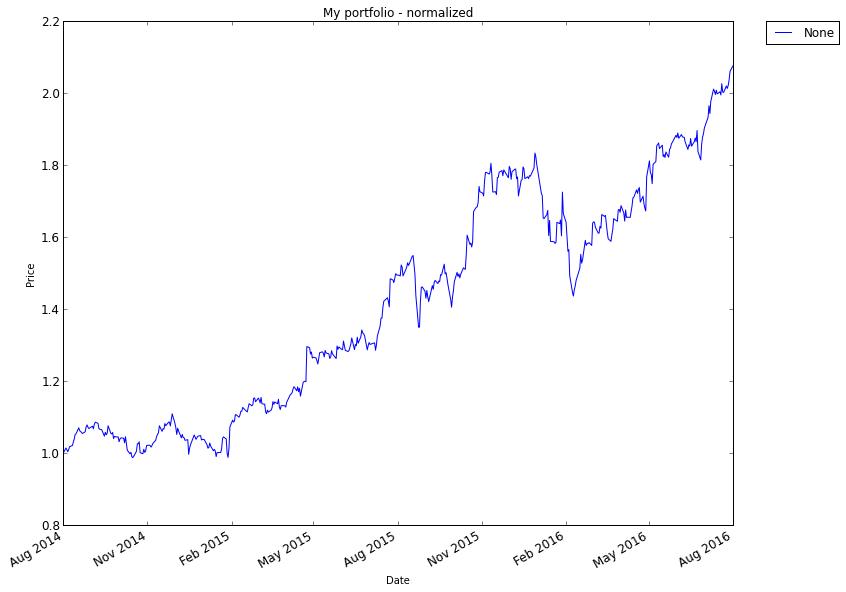

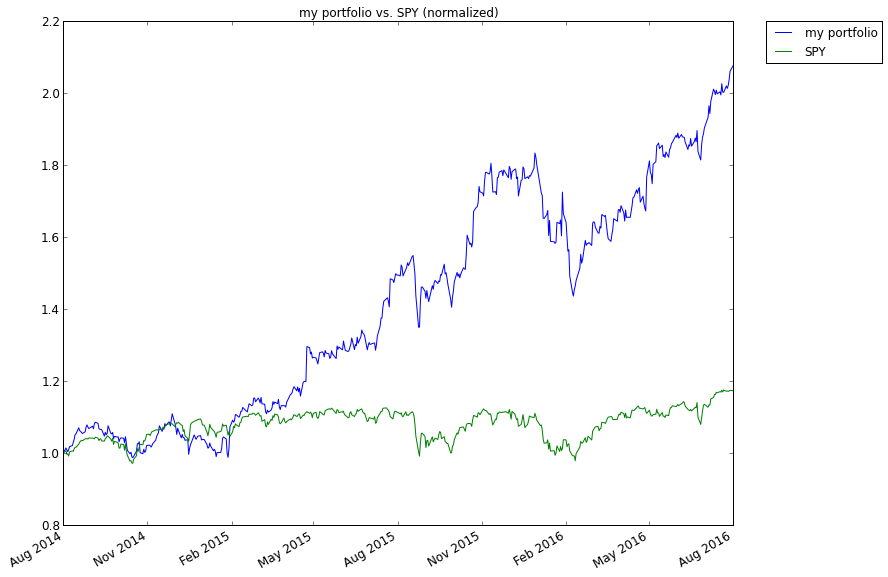

Allocation:  [0.0, 0.5, 0.1, 0.2, 0.2]
Cumulative return:  1.0754720122
Average daily return:  0.00156621211394
Daily standard deviation:  0.0151299604702
Sharpe ratio:  1.64328562339


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.54262040364
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1


Allocation optimized:  [ 0.2  0.2  0.2  0.2  0.2]


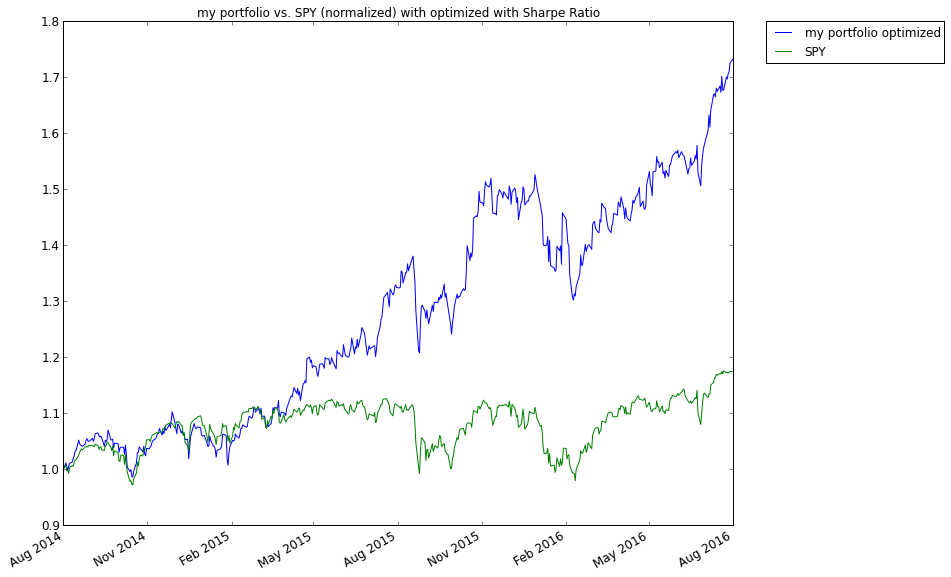

Allocation optimized:  [ 0.2  0.2  0.2  0.2  0.2]
Cumulative return:  0.731985472865
Average daily return:  0.00117101899033
Daily standard deviation:  0.0125452838721
Sharpe ratio:  1.48177995518




In [17]:
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df
  
    
def normalize_data(df):
    # normed = price/price[0]
    return df/ df.ix[0,:]
    
    
def compute_daily_returns_portfolio(df):
    daily_returns = (df/df.shift(1)) - 1
    # daily_returns.ix[0,:] = 0
    daily_returns.ix[0] = 0
    
    return daily_returns
 
    
def function(allocs, prices, start_val = 1000000, rfr = 0.0, sf = 252.0):
    
    sharpe_ratio = 1.54262040364
    sharpe_ratio = sharpe_ratio * -1
    
    return sharpe_ratio
    
    
def run_portfolio_stats():
    # Define a date range
    dates = pd.date_range('2014-08-01', '2016-08-01')

    # Choose stock symbols to read
    # symbols = ['SPY','AMZN','FB','AXY','GLD']
    symbols = ['SPY','AMZN','FB','AXY','MSFT']
    
    # Get stock data
    df = get_data(symbols, dates)
    
    # Fill empty trade dates (for AXY)
    df.fillna(method="ffill", inplace="True")
    df.fillna(method="bfill", inplace="True")
    
    # Normalize stock prices
    df_normalized = normalize_data(df)
    
    # Plot normalized data
    df = normalize_data(df)
    # plot_data(df.ix['2015-01-01':'2016-01-01', symbols], title="A portfolio of stocks - normalized")
    
    # Reflect fund allocation for each stock
    allocation = [0.0,0.5,0.1,0.2,0.2]
    df_allocation = df_normalized * allocation
    
    # Reflect starting values for each stock
    starting_value = [1000000]
    df_with_start_values = df_allocation * starting_value
    
    # Calculate portfolio value by day
    portfolio_values = df_with_start_values.sum(axis=1)
    
    # Plot portfolio values
    ax = portfolio_values.ix['2015-01-01':'2016-01-01'].plot(title="A portfolio of stocks - Incrementing daily values starting with $1,000,000",fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    # Plot portfolio values - normalized
    portfolio_values_normalized = normalize_data(portfolio_values)
    # plot_data(portfolio_values_normalized.ix['2015-01-01':'2016-01-01'], title="My portfolio - normalized")
    portfolio_values_normalized.ix['2015-01-01':'2016-01-01']
    ax = portfolio_values_normalized.plot(title="My portfolio - normalized",fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    # Plot "my portfolio" vs SPY
    portfolio_values_normalized.plot(title="my portfolio vs. SPY (normalized)",fontsize=12,figsize=(12,10), label="my portfolio")
    df['SPY'].plot(title="my portfolio vs. SPY (normalized)",fontsize=12,figsize=(12,10), label="SPY")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    print "Allocation: " , allocation
    
    # Compute daily returns
    daily_returns_portfolio = compute_daily_returns_portfolio(portfolio_values)
    
    # Remove first row "0" for portfolio calculations
    daily_returns_portfolio = daily_returns_portfolio[1:]
    
    # Cumulative return
    print "Cumulative return: ", (portfolio_values[-1] / portfolio_values[0]) - 1
    
    # Average daily return
    print "Average daily return: ", daily_returns_portfolio.mean()

    # Daily standard deviation 
    print "Daily standard deviation: ", daily_returns_portfolio.std()
    
    # Sharpe ratio
    trading_days = 252
    Sharpe_ratio = np.sqrt(trading_days) * (daily_returns_portfolio.mean()/daily_returns_portfolio.std())
    print "Sharpe ratio: ", Sharpe_ratio
    print "\n"
    
    ################################# Start of portfolio optimization #################################
    
    # find allocations for optimal portfolio
    estimate = np.ones(len(symbols)) * (1.0/len(symbols))
    bounds = [(0,1.0) for i in range(len(symbols))]
    allocation_optimized = spo.minimize(function, estimate, args=(df,), bounds=bounds, method='SLSQP', options={'disp':True}, constraints=({ 'type': 'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)})).x
    
    # note:  running this piece of code previously gives an allocation of [0.2,0.2,0.2,0.2,0.2]
    print "\n"
    print "Allocation optimized: " , allocation_optimized
  

    # Reflect fund allocation for each stock
    # allocation_optimized = [0.2,0.2,0.2,0.2,0.2]
    df_allocation_optimized = df_normalized * allocation_optimized
    
    # Reflect starting values for each stock
    starting_value = [1000000]
    df_with_start_values = df_allocation_optimized * starting_value
    
    # Calculate portfolio value by day
    portfolio_values = df_with_start_values.sum(axis=1)
    
    # Plot portfolio values
    #ax = portfolio_values.ix['2015-01-01':'2016-01-01'].plot(title="A portfolio of stocks - Incrementing daily values starting with $1,000,000",fontsize=12,figsize=(12,10))
    #ax.set_xlabel("Date")
    #ax.set_ylabel("Price")
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show()
    
    # Plot portfolio values - normalized
    portfolio_values_normalized = normalize_data(portfolio_values)
    # plot_data(portfolio_values_normalized.ix['2015-01-01':'2016-01-01'], title="My portfolio - normalized")
    #portfolio_values_normalized.ix['2015-01-01':'2016-01-01']
    #ax = portfolio_values_normalized.plot(title="My portfolio - normalized",fontsize=12,figsize=(12,10))
    #ax.set_xlabel("Date")
    #ax.set_ylabel("Price")
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show()
    
    # Plot
    portfolio_values_normalized.plot(title="my portfolio vs. SPY (normalized) with optimized with Sharpe Ratio",fontsize=12,figsize=(12,10), label="my portfolio optimized")
    df['SPY'].plot(title="my portfolio vs. SPY (normalized) with optimized with Sharpe Ratio",fontsize=12,figsize=(12,10), label="SPY")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    print "Allocation optimized: " , allocation_optimized
    
     # Compute daily returns
    daily_returns_portfolio = compute_daily_returns_portfolio(portfolio_values)
    
    # Remove first row "0" for portfolio calculations
    daily_returns_portfolio = daily_returns_portfolio[1:]
    
    # Cumulative return
    print "Cumulative return: ", (portfolio_values[-1] / portfolio_values[0]) - 1
    
    # Average daily return
    print "Average daily return: ", daily_returns_portfolio.mean()

    # Daily standard deviation 
    print "Daily standard deviation: ", daily_returns_portfolio.std()
    
    # Sharpe ratio
    trading_days = 252
    Sharpe_ratio = np.sqrt(trading_days) * (daily_returns_portfolio.mean()/daily_returns_portfolio.std())
    print "Sharpe ratio: ", Sharpe_ratio
    print "\n"

if __name__ == "__main__":
    run_portfolio_stats()